In [511]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from scipy.stats import kendalltau
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 


In [512]:
def Under_Sampling(X, Y):
  sm = RandomUnderSampler()
  X_under_sampled , Y_under_sampled = sm.fit_resample(X , Y)
  return X_under_sampled, Y_under_sampled

In [513]:
def Over_Sampling(X, Y):
  sm = RandomOverSampler()
  X_over_sampled , Y_over_sampled = sm.fit_resample(X , Y )
  return X_over_sampled, Y_over_sampled

Feature scaling the data with the min-max scaling method.

In [514]:
def Feature_Scaling(data):
  data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
  return data

Encoding the categorical columns in the data using label encoder.

In [515]:
def Encoding_Data(data):
  Categorical_Columns = ["Residence_type", "ever_married", "gender", "smoking_status", "work_type"]
  label_encoder = preprocessing.LabelEncoder()
  for column in Categorical_Columns:
    data[column]= label_encoder.fit_transform(data[column])
  return data


In [516]:
def Count_Visualization(data):
  columns = ['gender', 'hypertension', 'heart_disease', 'work_type', 'ever_married', 'Residence_type', 'smoking_status', 'stroke']
  plt.title("Count plots for categorical data")
  fig, axes = plt.subplots(4,2,figsize = (16,16))
  plot = []
  count = 0
  for i in range(4):
    for j in range(2):
      plot.append(sns.countplot(ax=axes[i,j],data=data,x=columns[count]))
      for k in plot[count].containers:
        plot[count].bar_label(k, )
      count += 1
  plt.show()



In [517]:
def Hist_Visualization(data, title):
  plt.title(title)
  sns.histplot(data)

Taking care of the N/A or unknown values and making age of type integer.

In [518]:
def Handle_Values(data, train=True):
  data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
  if train:
    data = data[data['gender'] != 'Other']
  else:
    data['gender'].replace("Other", "Male", inplace=True)
  data['age'] = data['age'].round()
  data['age'] = data['age'].astype(int)
  return data

Display number of unique values in each feature and display the unique values in the categorical features.

In [519]:
def Show_Unique_Values(data):
  print("Number of unique values in each column:")
  print(data.nunique(axis=0).to_string())
  unique_data_list = []
  temp_data = data.loc[:, data.dtypes == object]
  for column in temp_data.columns:
    unique_data_list.append(list(pd.unique(data[column])))
  print("\nUnique values in each categorical column")
  for index, column in enumerate(temp_data.columns):
    print(column + ":", unique_data_list[index])

Calculate the correlation coefficient between the numerical features and the target feature.

In [520]:
def Numerical_Correlation(data):
  Numerical_Columns = ["id", "age", "avg_glucose_level", "bmi", "stroke"]
  Numerical_Dataframe = data.loc[:, Numerical_Columns]
  correlations = [kendalltau(Numerical_Dataframe.iloc[:, i], Numerical_Dataframe.iloc[:, 4])[0] for i in range(Numerical_Dataframe.shape[1]-1)]
  Numerical_Columns.pop()
  print("\nNumerical features:", Numerical_Columns)
  print("Numerical correlation:", correlations)  
  sorted_indices = np.argsort(np.abs(correlations))[::-1]
  for index in sorted_indices:
   print(Numerical_Columns[index], "Correlation:", correlations[index])
  # Select the top 2 features with highest correlation coefficients
  selected_features = Numerical_Dataframe.columns[sorted_indices[:2]]
  # Display the selected features
  print("Selected numerical features: ", selected_features.tolist())
  return selected_features.tolist()

Calculate the correlation between the categorical features and the target feature using chi squared method.

In [521]:
def Categorical_Correlation(data):
  Categorical_Columns = ["Residence_type", "ever_married", "gender", "smoking_status", "work_type", "hypertension", "heart_disease"]
  Categorical_Dataframe = data.loc[:, Categorical_Columns]
  selector = SelectKBest(chi2, k=4)
  chi_sq = selector.fit(Categorical_Dataframe, data['stroke'])
  sorted_indices = np.argsort(np.abs(chi_sq.scores_))[::-1]
  selected_features = Categorical_Dataframe.columns[sorted_indices[:5]]
  print("\nCategorical features:")
  for index in sorted_indices:
   print(Categorical_Columns[index], "Correlation:", chi_sq.scores_[index])
  print("Selected categorical features:", selected_features.tolist())
  return selected_features.tolist()

In [522]:
def Detect_Outliers(data):
  Numerical_Columns = ["id", "age", "avg_glucose_level", "bmi"]
  Numerical_Dataframe = data.loc[:, Numerical_Columns]
  Z_Score = np.abs((Numerical_Dataframe-Numerical_Dataframe.mean())/Numerical_Dataframe.std())
  Threshold = 3
  num_out = len(Z_Score[(Z_Score > Threshold).any(axis=1)])
  print("Total number of outliers:", num_out)
  return data

In [523]:
def Detect_And_Remove_Duplicates(data):
  print("\nNumber of duplicates:", data.duplicated().sum())
  data.drop_duplicates(inplace=True)
  print("Number of duplicates after deleting them (if exist):", data.duplicated().sum())
  return data 

In [524]:
def Preprocessing(data, train=True):
 Show_Unique_Values(data)
 Handle_Values(data, train)
 x_data = data.drop('stroke', axis=1)
 y_data = data['stroke']
 if train:
  data = Detect_And_Remove_Duplicates(data)
 x_data = Encoding_Data(x_data)
 x_data = Feature_Scaling(x_data)
 data = x_data.join(y_data)
 if train:
  Numerical_Columns = Numerical_Correlation(data)
  Categorical_Columns = Categorical_Correlation(data)
  Selected_Features = Numerical_Columns + Categorical_Columns
  print("Total selected features:", Selected_Features)
  Features_string = ','.join(Selected_Features)
  with open('/content/Features.txt', 'w') as file:
    file.write(Features_string)
 with open('/content/Features.txt', 'r') as file:
    Features_text = file.read()
    Features_list = Features_text.split(",")
    Features_list.append('stroke')
 data = data.loc[:, Features_list]
 return data

Reading from the dataset

In [525]:
data = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')

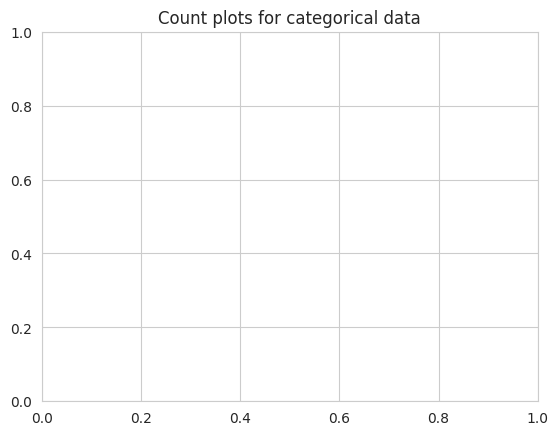

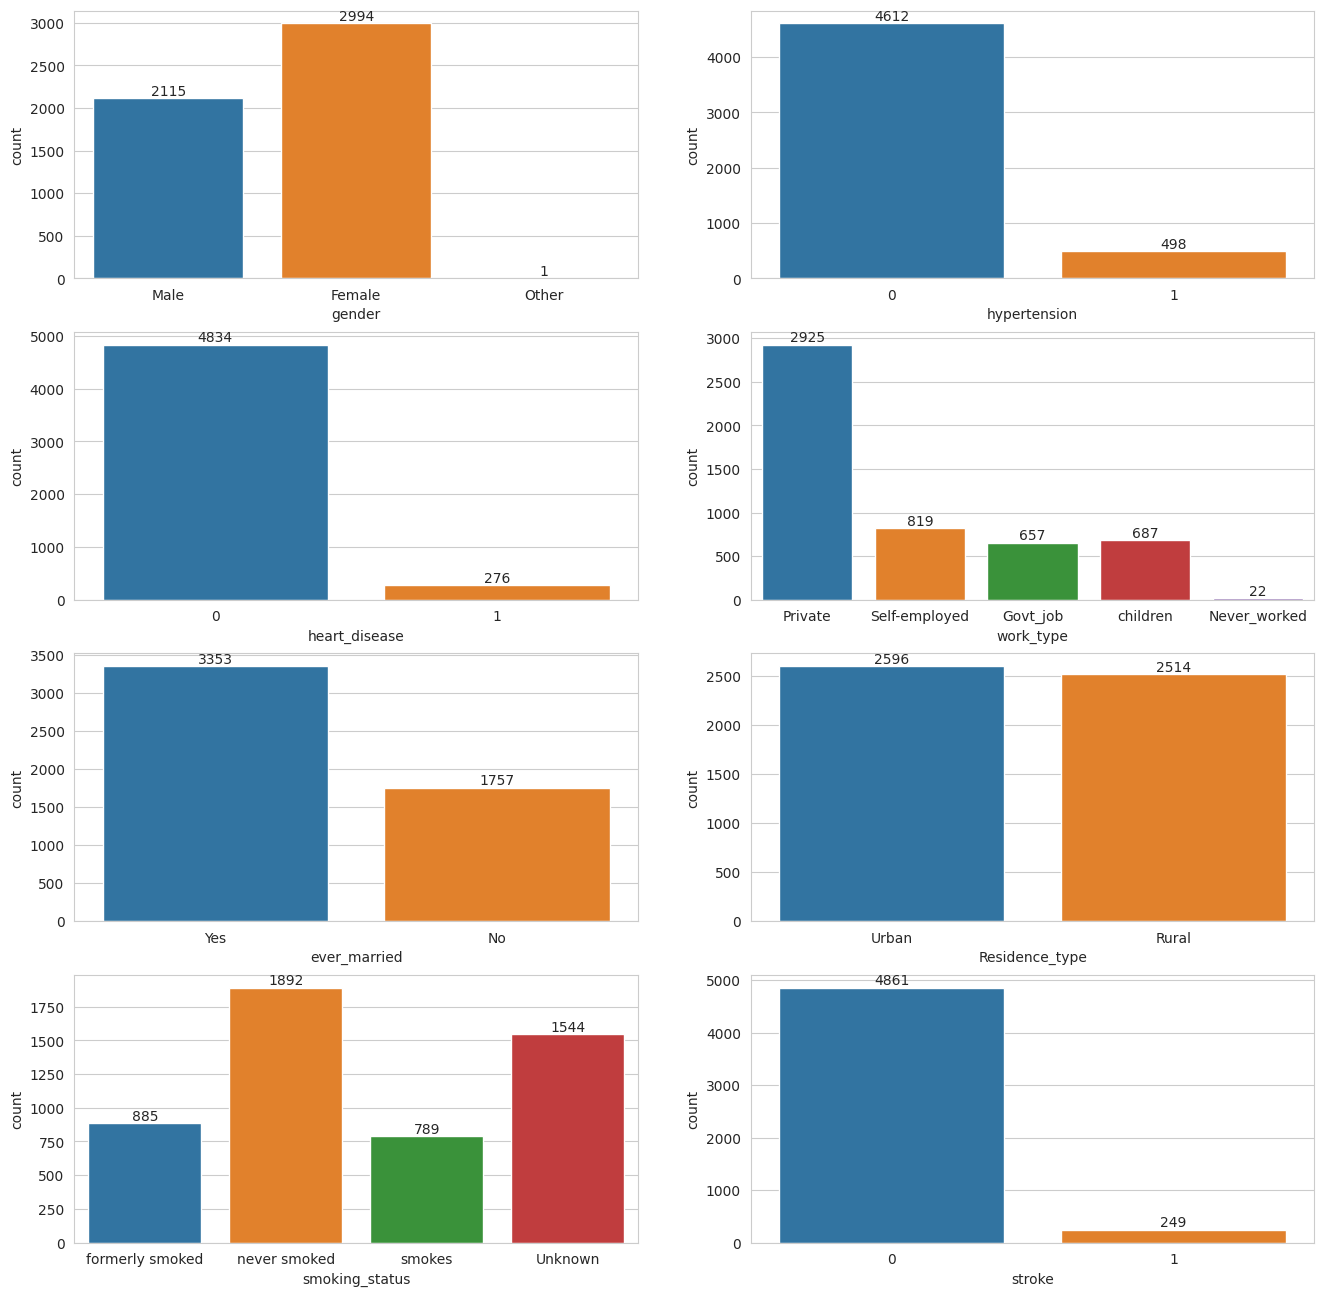

In [526]:
Count_Visualization(data)

we concluded that the data (some how) not biased to a specific gender

we concluded that (from the known data), most of the people are not smokers

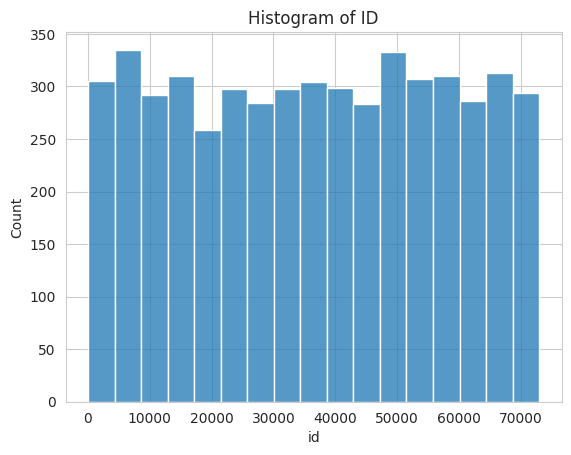

In [527]:
Hist_Visualization(data['id'], "Histogram of ID")

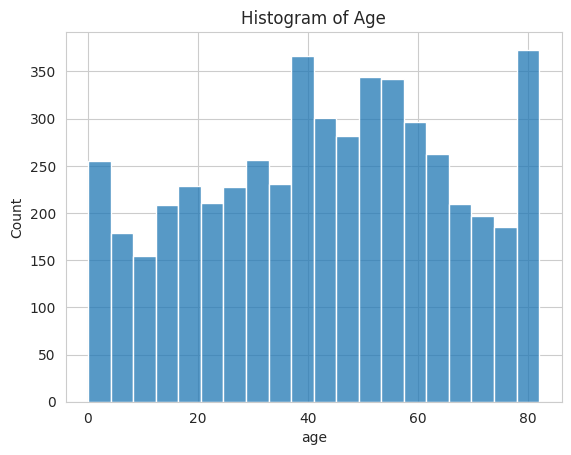

In [528]:
Hist_Visualization(data['age'], "Histogram of Age")

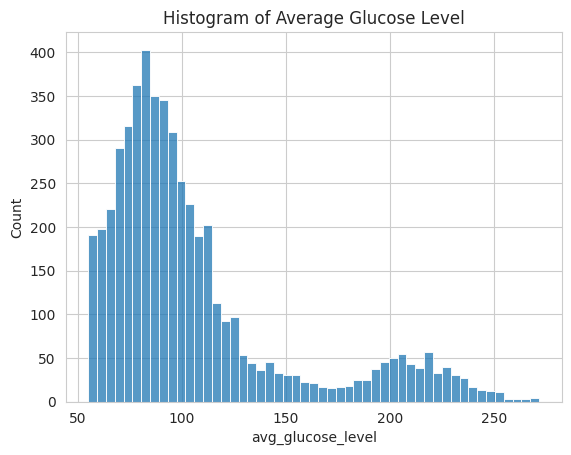

In [529]:
Hist_Visualization(data['avg_glucose_level'], "Histogram of Average Glucose Level")

The expected values for normal fasting blood glucose concentration are between 70 mg/dL  and 100 mg/dL , most of the data lies in  this range

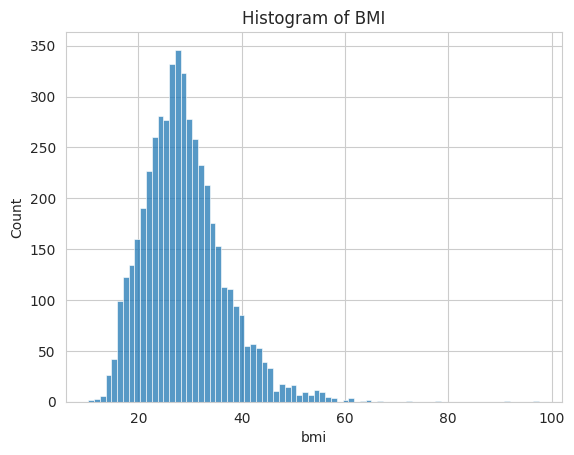

In [530]:
Hist_Visualization(data['bmi'], "Histogram of BMI")

This is to turn off SettingWithCopy warning

In [531]:
pd.options.mode.chained_assignment = None

In [532]:
X = data.drop('stroke', axis=1)
Y = data['stroke']

In [533]:
x_train, x_test , y_train , y_test = train_test_split(X, Y, test_size= 0.2,random_state=42, shuffle=True)

In [534]:
train_data = x_train.join(y_train)
test_data = x_test.join(y_test)

[Text(0.5, 1.0, 'Box Plot of ID')]

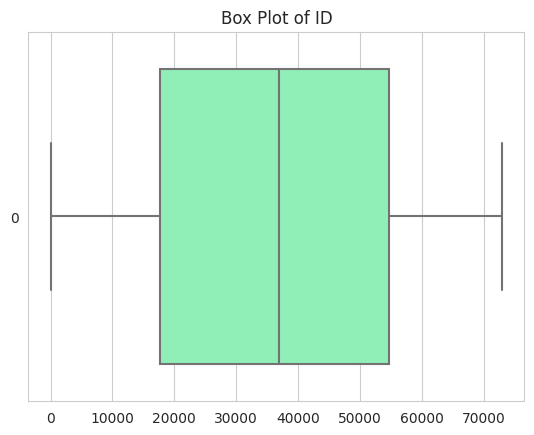

In [535]:
sns.boxplot(data=data['id'],palette='rainbow',orient='h').set(title='Box Plot of ID')

[Text(0.5, 1.0, 'Box Plot of Age')]

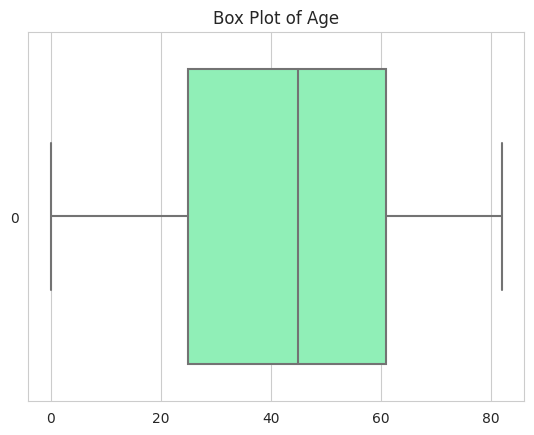

In [536]:
sns.boxplot(data=data['age'],palette='rainbow',orient='h').set(title='Box Plot of Age')

[Text(0.5, 1.0, 'Box Plot of Average Glucose Level')]

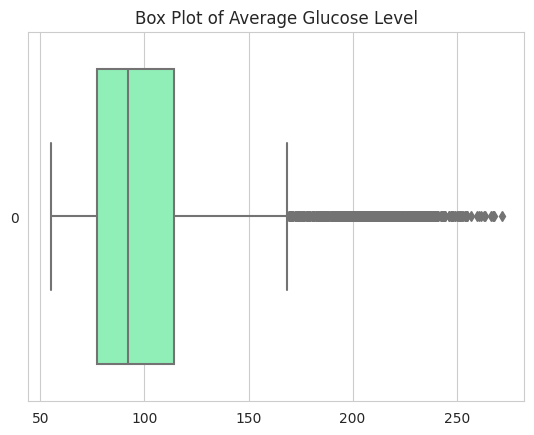

In [537]:
sns.boxplot(data=data['avg_glucose_level'],palette='rainbow',orient='h').set(title='Box Plot of Average Glucose Level')

[Text(0.5, 1.0, 'Box Plot of BMI')]

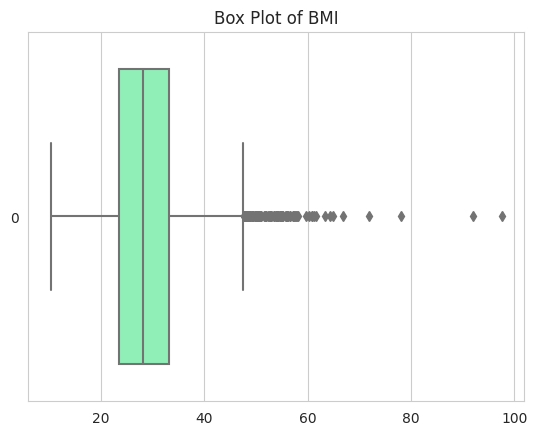

In [538]:
sns.boxplot(data=data['bmi'],palette='rainbow',orient='h').set(title='Box Plot of BMI')

In [539]:
train_data = Preprocessing(train_data)

Number of unique values in each column:
id                   4088
gender                  2
age                   103
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3320
bmi                   405
smoking_status          4
stroke                  2

Unique values in each categorical column
gender: ['Male', 'Female']
ever_married: ['Yes', 'No']
work_type: ['Self-employed', 'Private', 'Govt_job', 'children', 'Never_worked']
Residence_type: ['Rural', 'Urban']
smoking_status: ['formerly smoked', 'Unknown', 'never smoked', 'smokes']

Number of duplicates: 0
Number of duplicates after deleting them (if exist): 0

Numerical features: ['id', 'age', 'avg_glucose_level', 'bmi']
Numerical correlation: [0.008801328307196118, 0.19782682087160203, 0.07050519778086954, 0.0459562453657766]
age Correlation: 0.19782682087160203
avg_glucose_level Correlation: 0.07050519778086954
bmi Correlation: 0.04595

In [540]:
test_data = Preprocessing(test_data, False)

Number of unique values in each column:
id                   1022
gender                  3
age                    99
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level     962
bmi                   292
smoking_status          4
stroke                  2

Unique values in each categorical column
gender: ['Male', 'Female', 'Other']
ever_married: ['No', 'Yes']
work_type: ['Self-employed', 'children', 'Govt_job', 'Private', 'Never_worked']
Residence_type: ['Rural', 'Urban']
smoking_status: ['Unknown', 'never smoked', 'smokes', 'formerly smoked']


In [541]:
x_train = train_data.drop('stroke', axis=1)
y_train = train_data['stroke']
x_test = test_data.drop('stroke', axis=1)
y_test = test_data['stroke']

In [542]:
models_and_scores = dict()

Model using logistic regression with the scores for train and test.

In [543]:
logistic_model = linear_model.LogisticRegression()
logistic_model.fit(x_train, y_train)
predict = logistic_model.predict(x_test)
print("prediction:", predict)
print("Train score:", logistic_model.score(x_train, y_train))
print("Test score:", logistic_model.score(x_test, y_test))
models_and_scores['Logistic Model'] = (logistic_model.score(x_train,y_train) + logistic_model.score(x_test,y_test)) / 2

prediction: [0 0 0 ... 0 0 0]
Train score: 0.9542563600782779
Test score: 0.9393346379647749


Model using KNN classification algo. with the scores for train and test 


In [544]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 

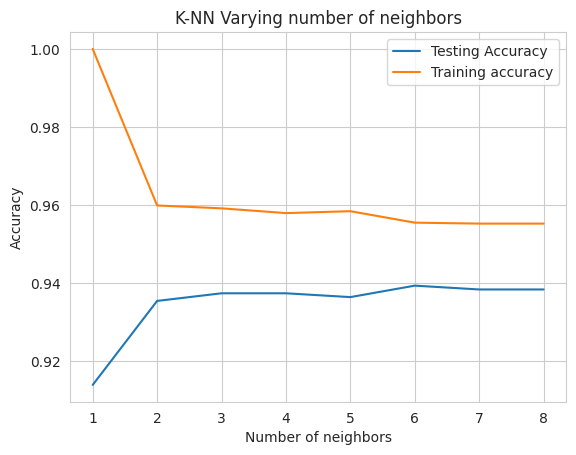

In [545]:
#generating the plot of best k by using elbow method
plt.title('K-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

As we can see, the best K is equals to 5

In [546]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print(knn.score(x_train, y_train))
print(knn.score(x_test,y_test))
models_and_scores['KNN'] = (knn.score(x_train,y_train) + knn.score(x_test,y_test)) / 2

0.9584148727984344
0.9363992172211351


Model using SVC 

In [547]:
svc_model=LinearSVC()
svc_model.fit(x_train,y_train)
train_pred=svc_model.predict(x_train)
y_preds=svc_model.predict(x_test)
print("prediction:", y_preds)
print("Train score:", svc_model.score(x_train, y_train))
print("Test score:", svc_model.score(x_test, y_test))
models_and_scores['Linear SVC'] = (svc_model.score(x_train,y_train) + svc_model.score(x_test,y_test)) / 2

prediction: [0 0 0 ... 0 0 0]
Train score: 0.9542563600782779
Test score: 0.9393346379647749


In [548]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)
prediction = decision_tree_model.predict(x_test)
print("prediction:", prediction)
print("Train score:", decision_tree_model.score(x_train, y_train))
print("Test score:", decision_tree_model.score(x_test, y_test))
models_and_scores['Decision Tree'] = (decision_tree_model.score(x_train,y_train) + decision_tree_model.score(x_test,y_test)) / 2

prediction: [0 0 0 ... 0 0 0]
Train score: 1.0
Test score: 0.9227005870841487


In [549]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train, y_train)
prediction = random_forest_model.predict(x_test)
print("prediction:", prediction)
print("Train score:", random_forest_model.score(x_train, y_train))
print("Test score:", random_forest_model.score(x_test, y_test))
models_and_scores['Random Forest'] = (random_forest_model.score(x_train,y_train) + random_forest_model.score(x_test,y_test)) / 2

prediction: [0 0 0 ... 0 0 0]
Train score: 1.0
Test score: 0.9373776908023483


In [550]:
gaussian_naive_bayes_model = GaussianNB()
gaussian_naive_bayes_model.fit(x_train, y_train)
prediction = gaussian_naive_bayes_model.predict(x_test)
print("prediction:", prediction)
print("Train score:", gaussian_naive_bayes_model .score(x_train, y_train))
print("Test score:", gaussian_naive_bayes_model.score(x_test, y_test))
models_and_scores['Naives Bayes'] = (gaussian_naive_bayes_model.score(x_train,y_train) + gaussian_naive_bayes_model.score(x_test,y_test)) / 2

prediction: [0 0 0 ... 0 0 1]
Train score: 0.8705968688845401
Test score: 0.8688845401174168


In [551]:
highest_score = max(models_and_scores)
print("Most suitable model for the dataset:", highest_score, " Accuracy: ", models_and_scores[highest_score])
sorted_models_and_scores = dict(sorted(models_and_scores.items(), key=lambda item: item[1], reverse=True))
for key, value in sorted_models_and_scores.items():
  print("Model name: ", key, " accuracy:", value)

Most suitable model for the dataset: Random Forest  Accuracy:  0.9686888454011742
Model name:  Random Forest  accuracy: 0.9686888454011742
Model name:  Decision Tree  accuracy: 0.9613502935420744
Model name:  KNN  accuracy: 0.9474070450097847
Model name:  Logistic Model  accuracy: 0.9467954990215264
Model name:  Linear SVC  accuracy: 0.9467954990215264
Model name:  Naives Bayes  accuracy: 0.8697407045009784
